# Aproximación de $\pi$
## Josué J.

El área de la región $S = \{(x,y) \,|\, x^2 + y^2 \leq 1 \}$ es $\alpha = \pi / 4$. Aproximando el área de $S$ con el método monte carlo y múltiplicando por 4 se obtiene una estimación del número $\pi$.

In [1]:
from numpy import random
import numpy as np
#import math
import matplotlib.pyplot as plt
#from statsmodels.tools import sequences

In [2]:
def Pi_Approximation(n): # N: number of points to simulate
    #N random point (x,y) in [0,1]X[0,1]
    x = np.random.rand(1,n)
    y = np.random.rand(1,n)

    count = np.count_nonzero(x**2 + y**2 <= 1) #number of points within S

    approx = 4 * count / n
    return approx

In [3]:
print(f"aproximación con n=100 es {Pi_Approximation(n=100)}")
print(f"pi = {np.pi}")

aproximación con n=100 es 3.32
pi = 3.141592653589793


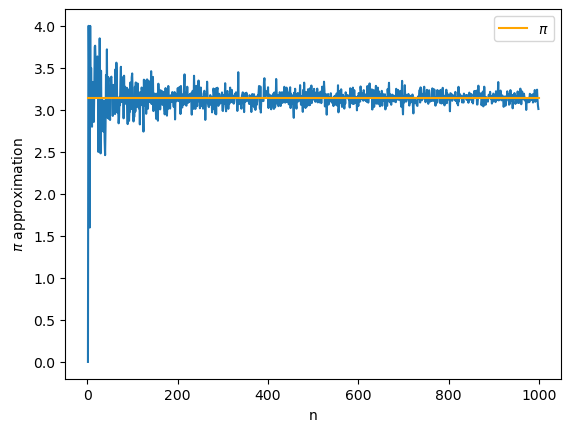

In [4]:
approximations = [Pi_Approximation(n) for n in range(1, 1000)]
plt.plot(range(1, 1000), approximations)
plt.plot([1, 1000], [np.pi, np.pi], color="orange", label=r"$\pi$")
plt.ylabel(r"$\pi$ approximation")
plt.xlabel("n")
plt.legend(loc="best")
plt.show()

Por la ley fuerte de los grandes números, conforme $n \to \infty$ la aproximación se acerca a $\pi$ casi seguramente.

## Desigualdad de Chebyshev
$$X_k(x,y) = 1, \text{ si } (x,y) \in S;$$

$$X_k(x,y) = 0, \text{ en otro caso.}$$
$$$\mathbb{E}(X_k) = \alpha; \, \text{Var}(X_k) = \alpha(1-\alpha)$

$$\text{aproximación} = \frac{1}{n} \sum_{i=1}^{n} X_i$$

$$ P( |\text{aproximación} - \pi| \geq \varepsilon ) \leq \pi(4-\pi) / n \varepsilon^2$$

In [5]:
epsilon = 0.001
n = 10000000
approximations = np.array([Pi_Approximation(n) for i in range(1,1000)]) #1000 simulations of pi(n)
probability = np.count_nonzero(np.abs(approximations - np.pi) >= epsilon) / 1000
print(f"{probability} <= {(np.pi)*(4 - np.pi)/(n*epsilon**2)}")
probability <= (np.pi)*(4 - np.pi)/(n*epsilon**2)

0.057 <= 0.26967662132698145


True